<a href="https://colab.research.google.com/github/ShlokArora2709/Mentorness/blob/main/Mentorness2_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Copy of train_data.csv')
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [ ]:
train.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [ ]:
train.nunique()

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Job title                 18
Family member count       10
Account age               61
Is high risk               2
dtype: int64

In [ ]:
train.loc[(train['Is high risk']==1) & (pd.isnull(train['Job title']))]

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
143,5118275,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-21363,365243,1,0,0,0,NaN,2.0,-56.0,1
558,5118046,F,N,N,0,81000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-23902,365243,1,0,1,0,NaN,1.0,-12.0,1
846,5058352,F,N,Y,0,99000.0,Pensioner,Higher education,Separated,House / apartment,-24611,365243,1,0,0,0,NaN,1.0,-11.0,1
883,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2.0,-36.0,1
989,5078946,F,N,Y,2,180000.0,Working,Incomplete higher,Separated,House / apartment,-12253,-3496,1,1,0,0,NaN,3.0,-51.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28183,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23835,365243,1,0,0,0,NaN,2.0,-9.0,1
28217,5089959,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755,-2105,1,0,0,0,NaN,3.0,-39.0,1
28229,5116761,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-60.0,1
28497,5024430,F,Y,Y,0,162000.0,Pensioner,Higher education,Married,House / apartment,-23886,365243,1,0,1,0,NaN,2.0,-56.0,1


In [ ]:
train.loc[(train['Is high risk']==1)]

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
114,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173,-678,1,0,1,1,Core staff,3.0,-16.0,1
143,5118275,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-21363,365243,1,0,0,0,NaN,2.0,-56.0,1
149,5023642,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-9.0,1
362,5065376,F,N,Y,0,215550.0,Working,Higher education,Married,House / apartment,-10429,-931,1,0,1,0,High skill tech staff,2.0,-48.0,1
410,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-9242,-508,1,0,0,0,Sales staff,1.0,-18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28543,5068208,F,N,N,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,-22535,-5467,1,0,1,0,NaN,2.0,-58.0,1
28575,5095839,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14882,-1132,1,1,1,0,Laborers,2.0,-39.0,1
28579,5125832,M,N,Y,0,270000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-11625,-195,1,0,0,1,Sales staff,1.0,-10.0,1
28718,5061132,M,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-19113,-2816,1,0,1,0,Core staff,2.0,-46.0,1


In [ ]:
train['Job title'].unique()

array(['Core staff', 'Accountants', 'Laborers', 'Managers', nan,
       'Sales staff', 'Medicine staff', 'High skill tech staff',
       'HR staff', 'Low-skill Laborers', 'Drivers', 'Secretaries',
       'Cleaning staff', 'Cooking staff', 'Security staff',
       'Private service staff', 'IT staff', 'Waiters/barmen staff',
       'Realty agents'], dtype=object)

In [ ]:
train['Job title'].fillna('unemployed', inplace=True)

In [ ]:
train.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

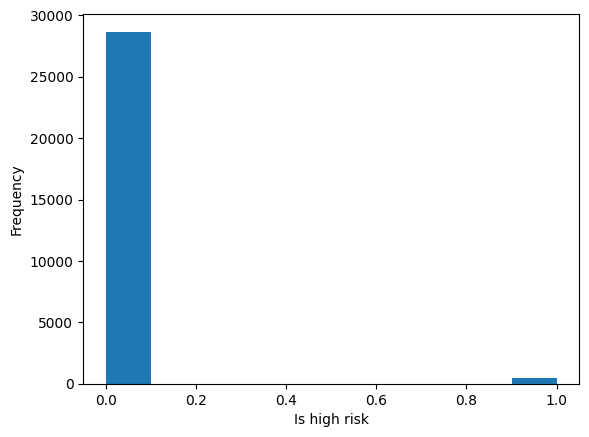

In [ ]:
plt.hist(train['Is high risk'])
plt.xlabel('Is high risk')
plt.ylabel('Frequency')
plt.show()

<ipython-input-37-b53c59317795>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train['Job title'].value_counts().index, y=train['Job title'].value_counts().values, palette="viridis")


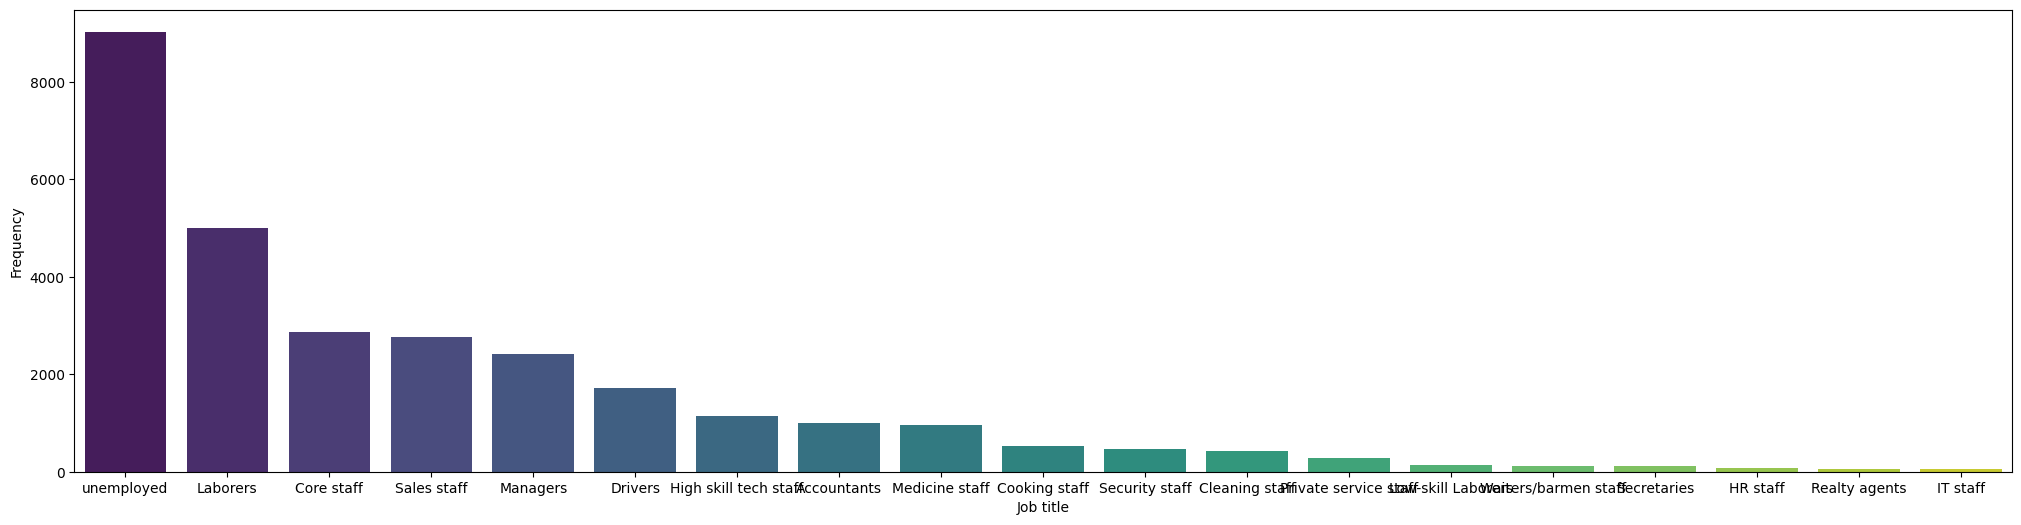

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x=train['Job title'].value_counts().index, y=train['Job title'].value_counts().values, palette="viridis")
plt.xlabel('Job title')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-cd90f7fab016>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train['Employment status'].value_counts().index, y=train['Employment status'].value_counts().values, palette="viridis")


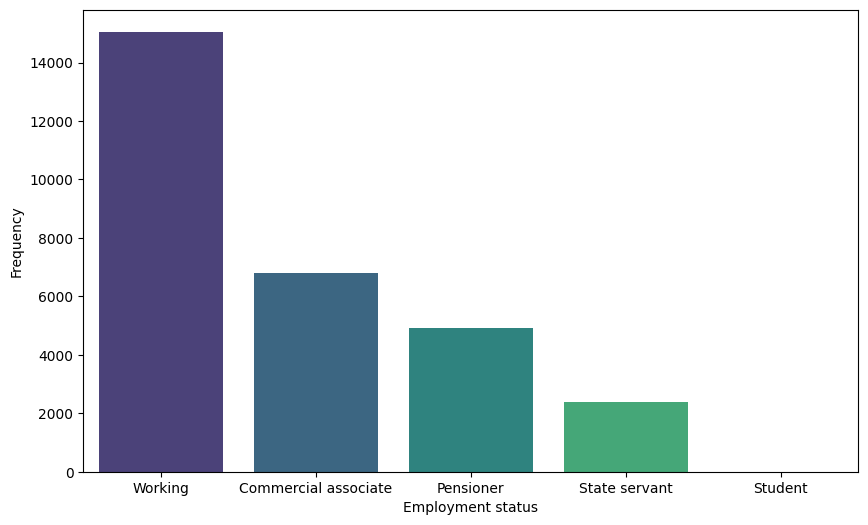

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=train['Employment status'].value_counts().index, y=train['Employment status'].value_counts().values, palette="viridis")
plt.xlabel('Employment status')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-8c4b8300bb35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train['Education level'].value_counts().index, y=train['Education level'].value_counts().values, palette="viridis")


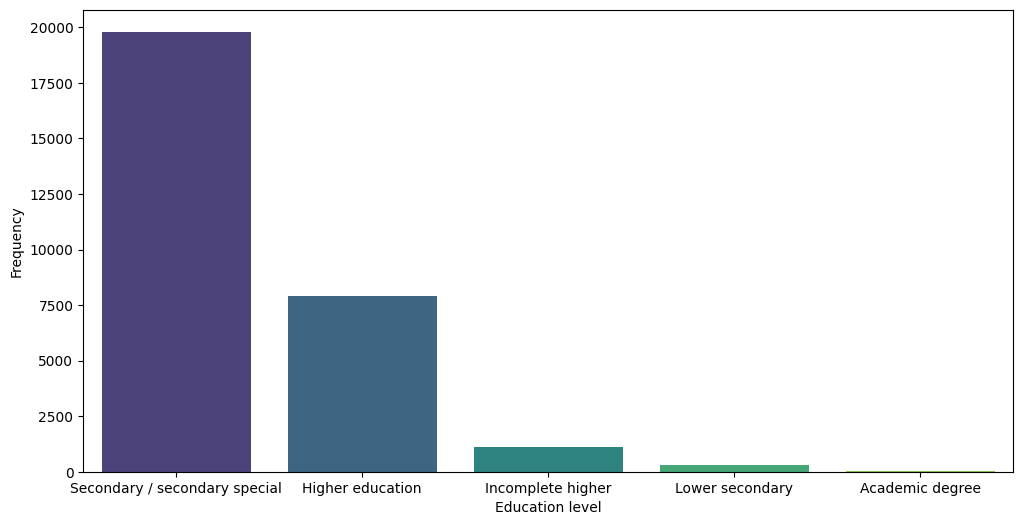

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=train['Education level'].value_counts().index, y=train['Education level'].value_counts().values, palette="viridis")
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-8cfaf4a2ccbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train['Dwelling'].value_counts().index, y=train['Dwelling'].value_counts().values, palette="viridis")


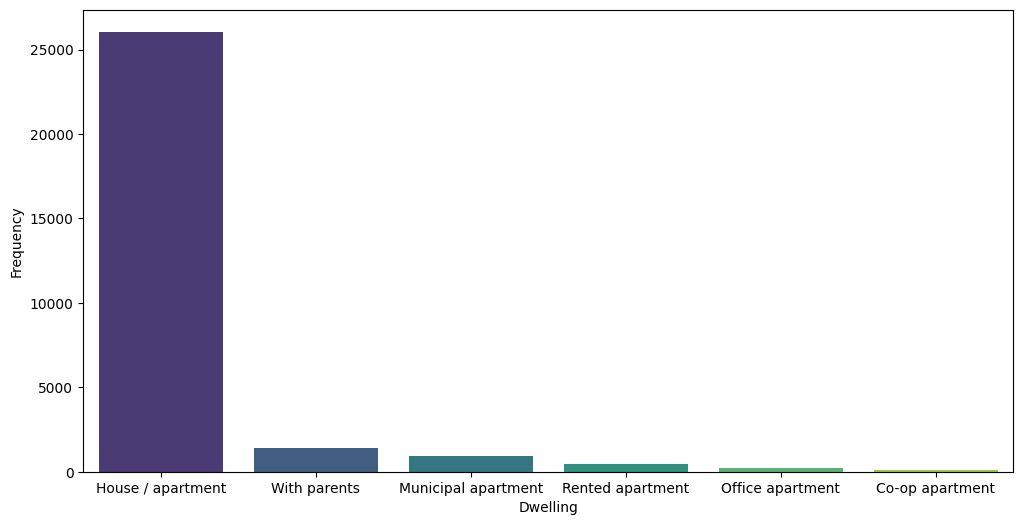

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=train['Dwelling'].value_counts().index, y=train['Dwelling'].value_counts().values, palette="viridis")
plt.xlabel('Dwelling')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train['Income per Family Member'] = train['Income'] / train['Family member count']
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Income per Family Member
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,...,-3111,1,0,0,0,Core staff,2.0,-17.0,0,67500.0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-1651,1,0,0,0,Accountants,2.0,-1.0,0,67500.0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-5657,1,0,0,0,Laborers,4.0,-38.0,0,45000.0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2046,1,0,0,1,Managers,1.0,-11.0,0,360000.0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,...,-515,1,0,1,0,unemployed,1.0,-41.0,0,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,1,unemployed,1.0,-5.0,0,112500.0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-8256,1,0,0,0,Core staff,3.0,-24.0,0,45000.0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,...,-3291,1,1,1,0,Managers,2.0,-29.0,0,38250.0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,unemployed,2.0,-37.0,0,78750.0


In [ ]:
train['Has secondary phone'] = ((train['Has a work phone'] == 1) | (train['Has a phone'] == 1)).astype(int)
train.drop(columns=['Has a work phone', 'Has a phone'], inplace=True)
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has an email,Job title,Family member count,Account age,Is high risk,Income per Family Member,Has secondary phone
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,Core staff,2.0,-17.0,0,67500.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,Accountants,2.0,-1.0,0,67500.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,Laborers,4.0,-38.0,0,45000.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,1,Managers,1.0,-11.0,0,360000.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,unemployed,1.0,-41.0,0,270000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,1,unemployed,1.0,-5.0,0,112500.0,1
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,Core staff,3.0,-24.0,0,45000.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,0,Managers,2.0,-29.0,0,38250.0,1
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,unemployed,2.0,-37.0,0,78750.0,1


In [ ]:
for i in ['Gender','Has a car','Has a property','Employment status','Education level', 'Marital status','Dwelling','Has a mobile phone','Has an email', 'Job title','Has secondary phone']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(train[i], train['Is high risk']))
    print(i, '---', pval)

Gender --- 0.0072102974472554775
Has a car --- 0.5551311539343562
Has a property --- 1.4649435529152808e-05
Employment status --- 0.07322706737015006
Education level --- 0.3071262739201515
Marital status --- 0.0011937073055487287
Dwelling --- 0.24553861334760702
Has a mobile phone --- 1.0
Has an email --- 0.4734884048171071
Job title --- 0.020863015771280115
Has secondary phone --- 0.9964488354570629


In [ ]:
continuous_features = ['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age', 'Income per Family Member']
for feature in continuous_features:
    groups = [train[train['Is high risk'] == group][feature].dropna() for group in train['Is high risk'].unique()]
    f_stat, p_val = f_oneway(*groups)

    print(f"ANOVA results for {feature}:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.16f}\n")

ANOVA results for Children count:
F-statistic: 0.0040, p-value: 0.9497418938771796

ANOVA results for Income:
F-statistic: 0.0904, p-value: 0.7636902107394080

ANOVA results for Age:
F-statistic: 0.1711, p-value: 0.6791045093780214

ANOVA results for Employment length:
F-statistic: 0.8499, p-value: 0.3565856417785417

ANOVA results for Family member count:
F-statistic: 1.1399, p-value: 0.2856908675958990

ANOVA results for Account age:
F-statistic: 117.2216, p-value: 0.0000000000000000

ANOVA results for Income per Family Member:
F-statistic: 0.8234, p-value: 0.3641970452908141



In [ ]:
train.drop(columns=['Has a car', 'Education level', 'Dwelling', 'Has an email', 'Has a mobile phone', 'Has secondary phone']+['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Income per Family Member','ID'], inplace=True)
train

,Gender,Has a property,Employment status,Marital status,Job title,Account age,Is high risk
0,M,Y,Working,Married,Core staff,-17.0,0
1,F,N,Commercial associate,Single / not married,Accountants,-1.0,0
2,F,Y,Commercial associate,Married,Laborers,-38.0,0
3,F,Y,Commercial associate,Single / not married,Managers,-11.0,0
4,F,N,Working,Separated,unemployed,-41.0,0
...,...,...,...,...,...,...,...
29160,F,Y,Pensioner,Single / not married,unemployed,-5.0,0
29161,F,Y,Commercial associate,Married,Core staff,-24.0,0
29162,F,Y,Working,Married,Managers,-29.0,0
29163,F,Y,Pensioner,Civil marriage,unemployed,-37.0,0


In [ ]:
categorical_cols = ['Gender', 'Employment status', 'Marital status', 'Job title']
binary_cols = ['Has a property']
numeric_cols = ['Account age']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first',sparse=False), categorical_cols),
        ('binary', FunctionTransformer(lambda x: pd.get_dummies(x, drop_first=True).astype(int), validate=False), binary_cols),
        ('num', MinMaxScaler(), numeric_cols)

    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Employment status',
                                  'Marital status', 'Job title']),
                                ('binary',
                                 FunctionTransformer(func=<function <lambda> at 0x7e749c26d2d0>),
                                 ['Has a property']),
                                ('num', MinMaxScaler(), ['Account age'])])

In [ ]:
preprocessor.fit(train)
processed_data = preprocessor.transform(train)
train_df=pd.DataFrame(processed_data)
train_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.716667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983333
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.366667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.816667
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.916667
29161,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000
29162,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.516667
29163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.383333


In [ ]:
y=train['Is high risk']
y

0        0
1        0
2        0
3        0
4        0
        ..
29160    0
29161    0
29162    0
29163    0
29164    0
Name: Is high risk, Length: 29165, dtype: int64

In [ ]:
rus = RandomUnderSampler(sampling_strategy=0.67, random_state=42)
smote_enn = SMOTEENN(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote_enn.fit_resample(train_df, y)
X_res, y_res = rus.fit_resample(X_res, y_res)
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_res))

Original dataset shape: Counter({0: 28666, 1: 499})
Resampled dataset shape: Counter({0: 13298, 1: 8910})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
xgb=XGBClassifier(params=	{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100})
xgb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:55:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 6,
                      'n_estimators': 100}, ...)

In [ ]:
y_pred=xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
f1_score(y_test, y_pred)

0.943276706017852

In [ ]:
accuracy_score(y_test, y_pred)

0.9556506078343089

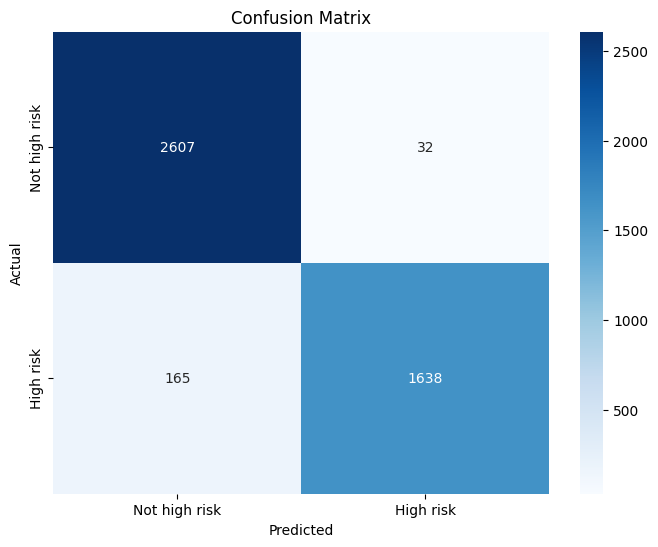

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Not high risk', 'High risk'], yticklabels=['Not high risk', 'High risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

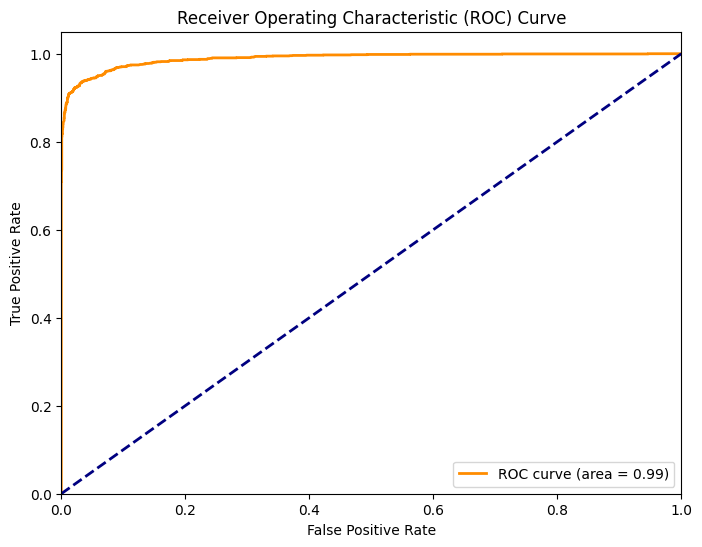

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()